In [1]:
# Imports for gplearn and pydotplus in order to see graph view

In [2]:

from IPython.display import Image
import pydotplus

from gplearn.genetic import SymbolicRegressor
from gplearn.fitness import make_fitness

In [3]:
#--Import the required libraries--
import math
import random
import matplotlib.pyplot as plt
import numpy as np

#--debug mode to report on evaluation of tree--
debug_eval = False



# Import Scipy generic dataset 
* Number of Instances:506
* Number of Attributes:13
* Attribute Information (in order):


<li>CRIM     per capita crime rate by town</li>
<li>ZN       proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS    proportion of non-retail business acres per town</li>
<li>CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</li>
<li>NOX      nitric oxides concentration (parts per 10 million)</li>
<li>RM       average number of rooms per dwelling</li>
<li>AGE      proportion of owner-occupied units built prior to 1940</li>
<li>DIS      weighted distances to five Boston employment centres</li>
<li>RAD      index of accessibility to radial highways</li>
<li>TAX      full-value property-tax rate per \\$10,000</li>
<li>PTRATIO  pupil-teacher ratio by town</li>
<li>B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>LSTAT    \\% lower status of the population</li>
<li>MEDV     Median value of owner-occupied homes in $1000’s</li>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

#load the data from the default data set, and split it into a tuple
data = load_boston(return_X_y = True)

#what percent of our data do we want to use to validate
split_percent = 0.2
train_x, test_x, train_y, test_y = train_test_split(*data, test_size = split_percent, random_state = 0)

#print out the shapes for clarity
print("Shapes:\n data_x:{}\n data_y:{}\n train_x:{}\n test_x:{}\n train_y:{}\n test_y:{}"
      .format(data[0].shape,data[1].shape,train_x.shape,test_x.shape,train_y.shape,test_y.shape))

Shapes:
 data_x:(506, 13)
 data_y:(506,)
 train_x:(404, 13)
 test_x:(102, 13)
 train_y:(404,)
 test_y:(102,)


# Symbolic regression with grid search


In [5]:
from sklearn.model_selection import GridSearchCV
est_gp = SymbolicRegressor()


In [6]:
parameters = {'function_set': [('add', 'sub', 'mul', 'div'), ('add', 'sub', 'mul', 'div',
                'sqrt', 'log', 'abs', 'neg', 'inv','max', 'min')],
             'init_depth': [(2, 6),(3,7)],
             'max_samples': [1.0,0.9],
             'p_crossover': [0.9,0.8],
             'p_hoist_mutation': [0.01,0.05],
             'p_point_mutation': [0.01,0.02],
             'random_state': [0],
             'tournament_size': [20,10],
             'verbose': [1],
             'warm_start': [False]}

In [7]:
#This part sets up the symbolic regressor
clf = GridSearchCV(est_gp, parameters, cv=5,n_jobs = -1, verbose = 1)
#This part runs it on our data
clf.fit(train_x, train_y)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 378 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  5.1min finished
C:\Users\Robert\AppData\Local\conda\conda\envs\gplearn\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     52.6 1.9129933339283094e+22        3 5.915269859160146 4.4033492753918315     14.01s
   1     8.64 10617.196379700465       15 5.22563441464415 5.9635570880566595     10.79s
   2     4.25 63.84941495041114       15 5.242068161436782 5.81805830547799      8.66s
   3     3.83 5730946.511084199       17 5.0624682554055775 5.702065994280583      7.18s
   4     4.67 33.86441061576987       15 4.318944177392749 4.658705379482012      6.34s
   5     9.45 350.6434262175075       15 4.338185514116107 4.48834915434593      5.90s
   6     15.2 32.56124815386207       15 4.190746056107593 5.793727770372534      5.65s
   7    18.77 47.55074232875669       17 4.122545535860669 5.370037529235271      5.48s
   8    21.35 30.128289167058398       23 3.8

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SymbolicRegressor(const_range=(-1.0, 1.0),
         function_set=('add', 'sub', 'mul', 'div'), generations=20,
         init_depth=(2, 6), init_method='half and half', max_samples=1.0,
         metric='mean absolute error', n_jobs=1, p_crossover=0.9,
         p_hoist_mutation=0.01, p_point... random_state=None, stopping_criteria=0.0, tournament_size=20,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'function_set': [('add', 'sub', 'mul', 'div'), ('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min')], 'init_depth': [(2, 6), (3, 7)], 'max_samples': [1.0, 0.9], 'p_crossover': [0.9, 0.8], 'p_hoist_mutation': [0.01, 0.05], 'p_point_mutation': [0.01, 0.02], 'random_state': [0], 'tournament_size': [20, 10], 'verbose': [1], 'warm_start': [False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbos

In [17]:
clf.best_params_

{'function_set': ('add', 'sub', 'mul', 'div'),
 'init_depth': (3, 7),
 'max_samples': 0.9,
 'p_crossover': 0.9,
 'p_hoist_mutation': 0.05,
 'p_point_mutation': 0.01,
 'random_state': 0,
 'tournament_size': 20,
 'verbose': 1,
 'warm_start': False}

# Scoring


In [15]:
 print(clf.best_estimator_._program)
clf.best_estimator_.score(test_x,test_y)

add(add(add(add(add(div(add(X6, X6), add(X10, X11)), div(add(X10, X11), add(X10, X12))), div(add(X6, X6), add(X10, X12))), div(div(add(div(X11, add(div(add(X10, X11), add(X10, X11)), div(add(div(X11, X10), X6), div(add(X6, X6), add(X6, X6))))), X11), add(X10, X10)), add(X12, X2))), div(div(X11, X10), add(X12, X2))), div(div(X11, X10), X12))


0.46555031057116003

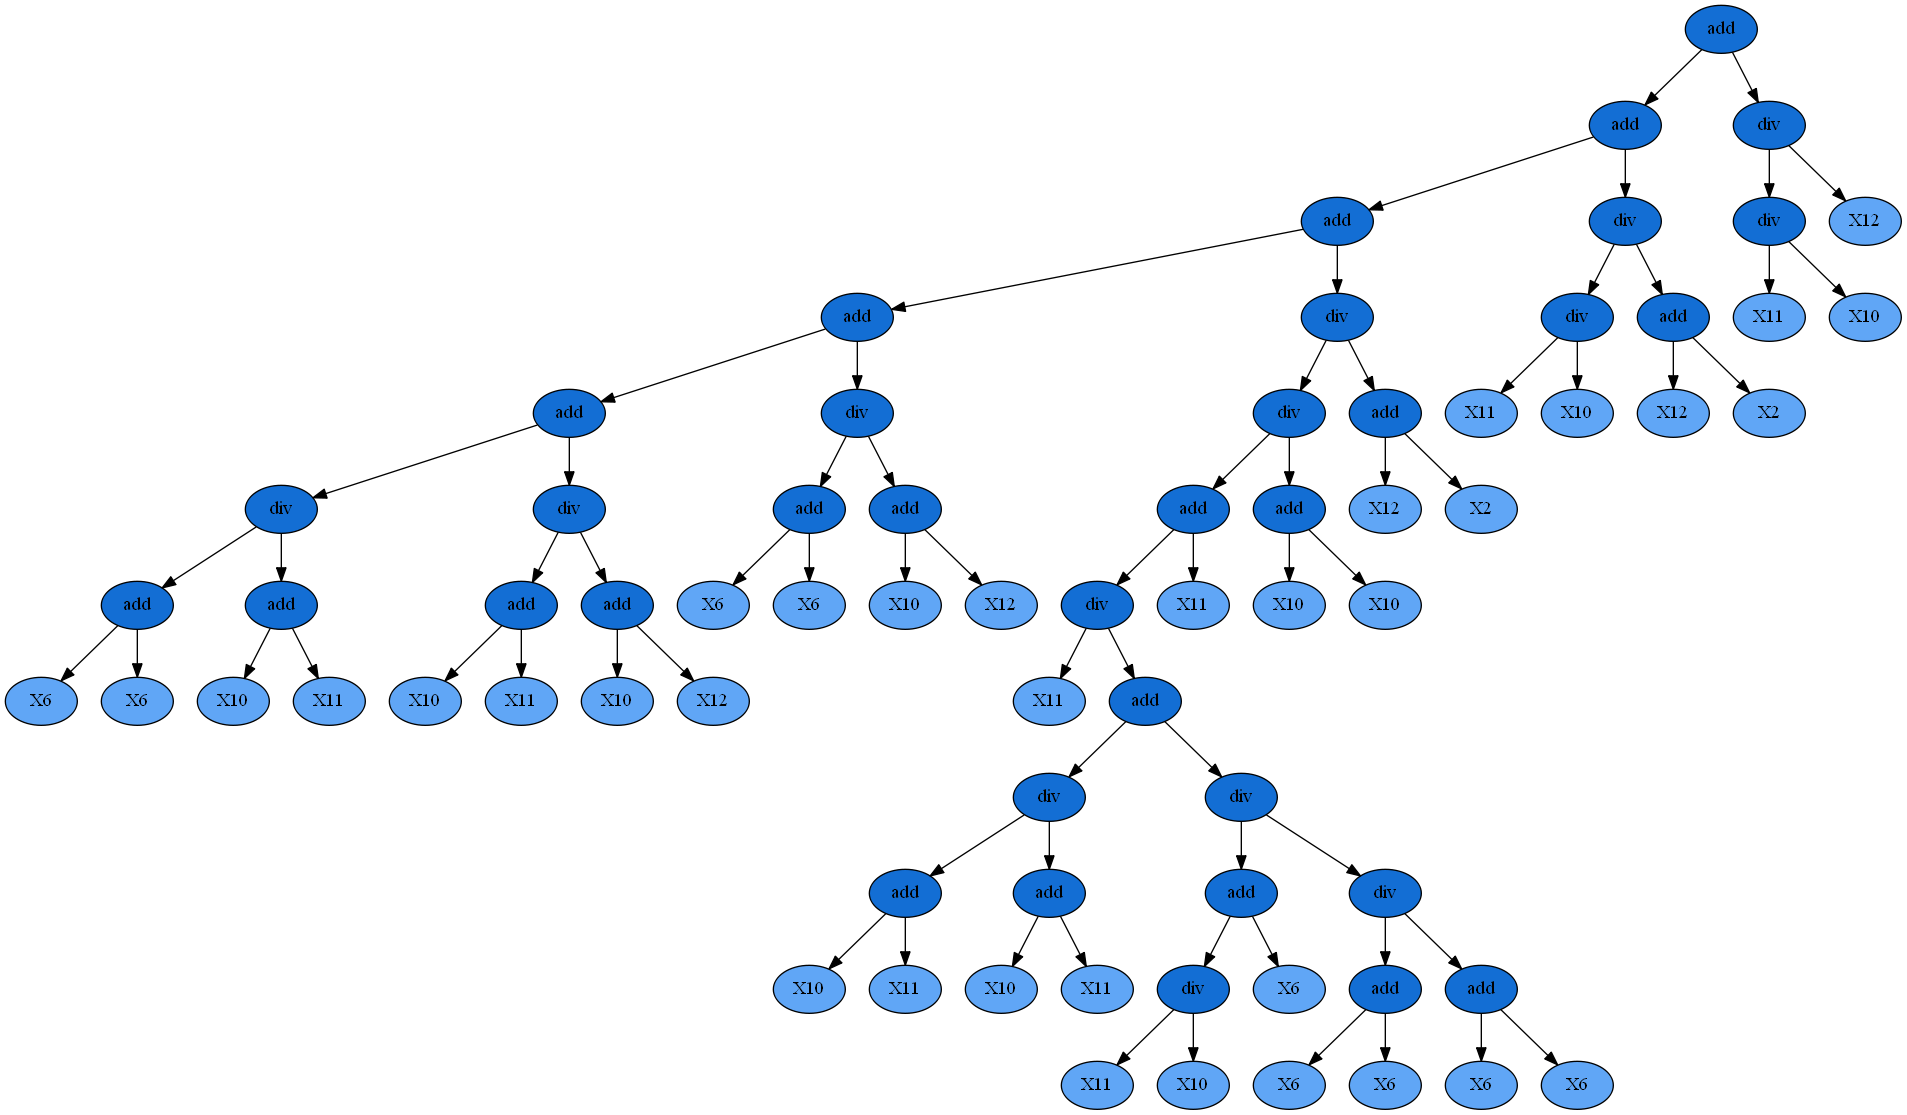

In [16]:
graph = pydotplus.graphviz.graph_from_dot_data(clf.best_estimator_._program.export_graphviz())
Image(graph.create_png())